# Embedding distance analysis

In this notebook we look at the distance between the prompt embeddings and the clsuter centroids from the reference embeddings.

In [2]:
import boto3
tbl = 'CdkStack-DistanceTable7AB0B18A-ZPIO3CXWGRM7'
ddbclient = boto3.client('dynamodb')

In [3]:
response = ddbclient.scan(
    TableName=tbl,
    Select='ALL_ATTRIBUTES',
    ConsistentRead=False,
)

In [9]:
import pandas as pd
means = []
medians = []
stdevs = []
jobdates = []

for item in response['Items']:
    means.append(item['mean']['N'])
    medians.append(item['median']['N'])
    stdevs.append(item['stdev']['N'])
    jobdates.append(item['jobdate']['N'])

In [10]:
df = pd.DataFrame({
    'mean': means,
    'median': medians,
    'stdev': stdevs,
    'jobdate': jobdates
})

In [13]:
df['jobdt'] = pd.to_datetime(df['jobdate'], unit='s')

In [14]:
df

,mean,median,stdev,jobdate,jobdt
0,670.8318328857422,637.1812133789062,364.64147433962694,1690408161,2023-07-26 21:49:21
1,672.7436180114746,224.2756805419922,392.16331670521356,1690409154,2023-07-26 22:05:54


In [18]:
dfPlot = df.melt('jobdt', value_vars=['mean', 'median', 'stdev'])
dfPlot

,jobdt,variable,value
0,2023-07-26 21:49:21,mean,670.8318328857422
1,2023-07-26 22:05:54,mean,672.7436180114746
2,2023-07-26 21:49:21,median,637.1812133789062
3,2023-07-26 22:05:54,median,224.2756805419922
4,2023-07-26 21:49:21,stdev,364.64147433962694
5,2023-07-26 22:05:54,stdev,392.16331670521356


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

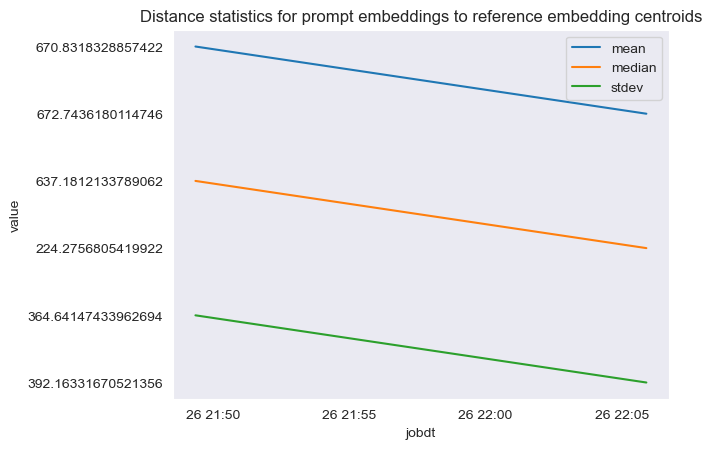

In [22]:
sns.lineplot(data=dfPlot, x="jobdt", y="value", hue="variable")
plt.title("Distance statistics for prompt embeddings to reference embedding centroids")
plt.legend(loc='upper right')